In [76]:
import pandas as pd

In [77]:
df = pd.read_csv('time_series_60min_singleindex.csv')

In [78]:
df.head()

,utc_timestamp,cet_cest_timestamp,AT_load_actual_entsoe_transparency,AT_load_forecast_entsoe_transparency,AT_price_day_ahead,AT_solar_generation_actual,AT_wind_onshore_generation_actual,BE_load_actual_entsoe_transparency,BE_load_forecast_entsoe_transparency,BE_solar_generation_actual,...,SI_load_actual_entsoe_transparency,SI_load_forecast_entsoe_transparency,SI_solar_generation_actual,SI_wind_onshore_generation_actual,SK_load_actual_entsoe_transparency,SK_load_forecast_entsoe_transparency,SK_solar_generation_actual,SK_wind_onshore_generation_actual,UA_load_actual_entsoe_transparency,UA_load_forecast_entsoe_transparency
0,2014-12-31T23:00:00Z,2015-01-01T00:00:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-01T00:00:00Z,2015-01-01T01:00:00+0100,5946.0,6701.0,35.0,NaN,69.0,9484.0,9897.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-01-01T01:00:00Z,2015-01-01T02:00:00+0100,5726.0,6593.0,45.0,NaN,64.0,9152.0,9521.0,NaN,...,1045.47,816.0,NaN,1.17,2728.0,2860.0,3.8,NaN,NaN,NaN
3,2015-01-01T02:00:00Z,2015-01-01T03:00:00+0100,5347.0,6482.0,41.0,NaN,65.0,8799.0,9135.0,NaN,...,1004.79,805.0,NaN,1.04,2626.0,2810.0,3.8,NaN,NaN,NaN
4,2015-01-01T03:00:00Z,2015-01-01T04:00:00+0100,5249.0,6454.0,38.0,NaN,64.0,8567.0,8909.0,NaN,...,983.79,803.0,NaN,1.61,2618.0,2780.0,3.8,NaN,NaN,NaN


In [79]:
df = df[['utc_timestamp', 'AT_solar_generation_actual']]
df_solar = df.copy()
df_solar.head()

,utc_timestamp,AT_solar_generation_actual
0,2014-12-31T23:00:00Z,NaN
1,2015-01-01T00:00:00Z,NaN
2,2015-01-01T01:00:00Z,NaN
3,2015-01-01T02:00:00Z,NaN
4,2015-01-01T03:00:00Z,NaN


taking data related to austria

In [80]:
df_solar.rename(columns={'utc_timestamp': 'ds', 'AT_solar_generation_actual': 'y'}, inplace=True)
df_solar.head()

,ds,y
0,2014-12-31T23:00:00Z,NaN
1,2015-01-01T00:00:00Z,NaN
2,2015-01-01T01:00:00Z,NaN
3,2015-01-01T02:00:00Z,NaN
4,2015-01-01T03:00:00Z,NaN


In [81]:
df_solar['ds'] = pd.to_datetime(df_solar['ds']).dt.tz_localize(None)
df_solar.head()

,ds,y
0,2014-12-31 23:00:00,NaN
1,2015-01-01 00:00:00,NaN
2,2015-01-01 01:00:00,NaN
3,2015-01-01 02:00:00,NaN
4,2015-01-01 03:00:00,NaN


In [82]:
df_solar['y'].interpolate(method='linear', inplace=True)
df_solar.head()

,ds,y
0,2014-12-31 23:00:00,NaN
1,2015-01-01 00:00:00,NaN
2,2015-01-01 01:00:00,NaN
3,2015-01-01 02:00:00,NaN
4,2015-01-01 03:00:00,NaN


In [83]:
from prophet import Prophet

# Train Prophet model
model = Prophet(yearly_seasonality=True, weekly_seasonality=True)
model.fit(df_solar)

# Generate forecasts
forecast = model.predict(df_solar)

# Extract Prophet components
df_features = forecast[['ds', 'yhat', 'trend', 'weekly', 'yearly', 'additive_terms']]


17:43:58 - cmdstanpy - INFO - Chain [1] start processing
17:45:10 - cmdstanpy - INFO - Chain [1] done processing


In [84]:
df_timeseries = pd.merge(df_solar, df_features, on='ds', how='inner')


In [85]:
df_weather = pd.read_csv('weather_data.csv')

columns = ['utc_timestamp', 'AT_temperature', 
                    'AT_radiation_direct_horizontal', 'AT_radiation_diffuse_horizontal']

df_weather = df_weather[columns]
df_weather.head()

,utc_timestamp,AT_temperature,AT_radiation_direct_horizontal,AT_radiation_diffuse_horizontal
0,1980-01-01T00:00:00Z,-3.640,0.0,0.0
1,1980-01-01T01:00:00Z,-3.803,0.0,0.0
2,1980-01-01T02:00:00Z,-3.969,0.0,0.0
3,1980-01-01T03:00:00Z,-4.076,0.0,0.0
4,1980-01-01T04:00:00Z,-4.248,0.0,0.0


In [86]:
df_pv = pd.read_csv('ninja_pv_wind_profiles_singleindex.csv')
columns = ['time', 'AT_pv_national_current']

df_pv = df_pv[columns]
df_pv.head()

,time,AT_pv_national_current
0,1980-01-01T00:00:00Z,0.0
1,1980-01-01T01:00:00Z,0.0
2,1980-01-01T02:00:00Z,0.0
3,1980-01-01T03:00:00Z,0.0
4,1980-01-01T04:00:00Z,0.0


In [87]:
df_weather.rename(columns={'utc_timestamp': 'ds'}, inplace=True)
df_weather['ds'] = pd.to_datetime(df_weather['ds']).dt.tz_localize(None)

In [88]:
df_pv.rename(columns={'time': 'ds'}, inplace=True)
df_pv['ds'] = pd.to_datetime(df_pv['ds']).dt.tz_localize(None)

In [89]:
df_merged = pd.merge(df_timeseries, df_weather, on='ds', how='inner')
df_merged.head()

,ds,y,yhat,trend,weekly,yearly,additive_terms,AT_temperature,AT_radiation_direct_horizontal,AT_radiation_diffuse_horizontal
0,2014-12-31 23:00:00,NaN,-114.318623,127.491182,1.650725,-108.176039,-241.809805,-6.495,0.0,0.0
1,2015-01-01 00:00:00,NaN,-112.978776,127.462522,1.734616,-108.159397,-240.441298,-6.503,0.0,0.0
2,2015-01-01 01:00:00,NaN,-113.090870,127.433862,1.815499,-108.142902,-240.524732,-6.458,0.0,0.0
3,2015-01-01 02:00:00,NaN,-114.841869,127.405202,1.893195,-108.126556,-242.247071,-6.253,0.0,0.0
4,2015-01-01 03:00:00,NaN,-112.825293,127.376543,1.967524,-108.110358,-240.201836,-5.908,0.0,0.0


In [90]:
df = pd.merge(df_merged, df_pv, on='ds', how='inner')
df.head()

,ds,y,yhat,trend,weekly,yearly,additive_terms,AT_temperature,AT_radiation_direct_horizontal,AT_radiation_diffuse_horizontal,AT_pv_national_current
0,2014-12-31 23:00:00,NaN,-114.318623,127.491182,1.650725,-108.176039,-241.809805,-6.495,0.0,0.0,0.0
1,2015-01-01 00:00:00,NaN,-112.978776,127.462522,1.734616,-108.159397,-240.441298,-6.503,0.0,0.0,0.0
2,2015-01-01 01:00:00,NaN,-113.090870,127.433862,1.815499,-108.142902,-240.524732,-6.458,0.0,0.0,0.0
3,2015-01-01 02:00:00,NaN,-114.841869,127.405202,1.893195,-108.126556,-242.247071,-6.253,0.0,0.0,0.0
4,2015-01-01 03:00:00,NaN,-112.825293,127.376543,1.967524,-108.110358,-240.201836,-5.908,0.0,0.0,0.0


In [91]:
df.drop(columns=['yhat'], inplace=True)
df.head()

,ds,y,trend,weekly,yearly,additive_terms,AT_temperature,AT_radiation_direct_horizontal,AT_radiation_diffuse_horizontal,AT_pv_national_current
0,2014-12-31 23:00:00,NaN,127.491182,1.650725,-108.176039,-241.809805,-6.495,0.0,0.0,0.0
1,2015-01-01 00:00:00,NaN,127.462522,1.734616,-108.159397,-240.441298,-6.503,0.0,0.0,0.0
2,2015-01-01 01:00:00,NaN,127.433862,1.815499,-108.142902,-240.524732,-6.458,0.0,0.0,0.0
3,2015-01-01 02:00:00,NaN,127.405202,1.893195,-108.126556,-242.247071,-6.253,0.0,0.0,0.0
4,2015-01-01 03:00:00,NaN,127.376543,1.967524,-108.110358,-240.201836,-5.908,0.0,0.0,0.0


In [92]:
df['Year'] = pd.to_datetime(df['ds']).dt.year
df['Month'] = pd.to_datetime(df['ds']).dt.month
df['Day'] = pd.to_datetime(df['ds']).dt.day
df['Hour'] = pd.to_datetime(df['ds']).dt.hour
df['DayOfWeek'] = pd.to_datetime(df['ds']).dt.dayofweek

In [93]:
df.head()

,ds,y,trend,weekly,yearly,additive_terms,AT_temperature,AT_radiation_direct_horizontal,AT_radiation_diffuse_horizontal,AT_pv_national_current,Year,Month,Day,Hour,DayOfWeek
0,2014-12-31 23:00:00,NaN,127.491182,1.650725,-108.176039,-241.809805,-6.495,0.0,0.0,0.0,2014,12,31,23,2
1,2015-01-01 00:00:00,NaN,127.462522,1.734616,-108.159397,-240.441298,-6.503,0.0,0.0,0.0,2015,1,1,0,3
2,2015-01-01 01:00:00,NaN,127.433862,1.815499,-108.142902,-240.524732,-6.458,0.0,0.0,0.0,2015,1,1,1,3
3,2015-01-01 02:00:00,NaN,127.405202,1.893195,-108.126556,-242.247071,-6.253,0.0,0.0,0.0,2015,1,1,2,3
4,2015-01-01 03:00:00,NaN,127.376543,1.967524,-108.110358,-240.201836,-5.908,0.0,0.0,0.0,2015,1,1,3,3


In [94]:
# Drop rows where 'y' is NaN
df = df.dropna(subset=['y'])

In [95]:
df.drop(columns=['ds'], inplace=True)

In [96]:
df.head()

,y,trend,weekly,yearly,additive_terms,AT_temperature,AT_radiation_direct_horizontal,AT_radiation_diffuse_horizontal,AT_pv_national_current,Year,Month,Day,Hour,DayOfWeek
8,2.0,127.261904,2.227598,-108.047052,-34.446921,-4.179,1.5613,25.9639,0.035,2015,1,1,7,3
9,10.0,127.233244,2.282419,-108.031597,52.769208,-2.807,7.5467,75.0443,0.110,2015,1,1,8,3
10,21.0,127.204585,2.332814,-108.016292,126.839936,-1.315,17.2073,116.9171,0.166,2015,1,1,9,3
11,32.0,127.175925,2.378614,-108.001136,174.599198,-0.051,35.4289,146.8923,0.225,2015,1,1,10,3
12,37.0,127.147265,2.419656,-107.986129,187.822793,0.791,58.5238,151.4721,0.266,2015,1,1,11,3


In [97]:
y = df['y']                 # Target variable
X = df.drop(columns=['y'])  # Drop the target variable

In [98]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [99]:
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")


Training set shape: (35053, 13)
Test set shape: (8764, 13)


In [100]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# Convert data into DMatrix (optional, but efficient for XGBoost)
train_data = xgb.DMatrix(X_train, label=y_train)
test_data = xgb.DMatrix(X_test, label=y_test)

# Define parameters
params = {
    'objective': 'reg:squarederror',  # Regression task
    'max_depth': 6,
    'eta': 0.1,  # Learning rate
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'seed': 42
}

# Train model
num_round = 100
model = xgb.train(params, train_data, num_round)

# Predict
y_pred = model.predict(test_data)

# Evaluate
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"RMSE: {rmse}")

RMSE: 23.851471187425037


C:\Users\Qc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


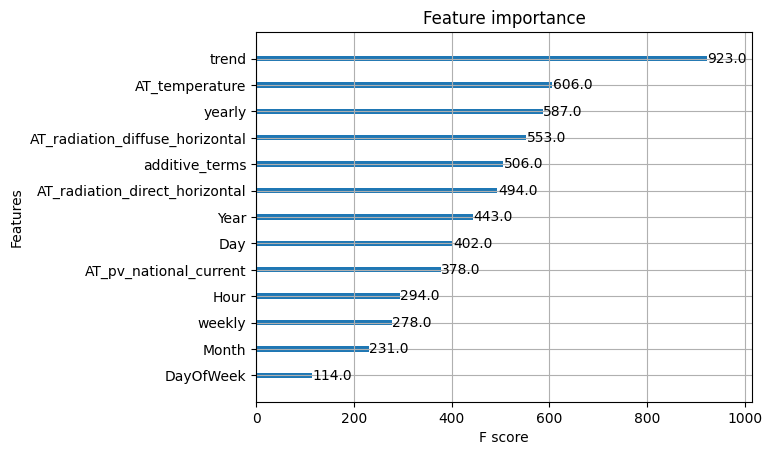

In [101]:
import matplotlib.pyplot as plt

xgb.plot_importance(model)
plt.show()